In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (40.0, 20.0)
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [2]:
df = pd.read_pickle('../../Data/Mobile/train.pkl')

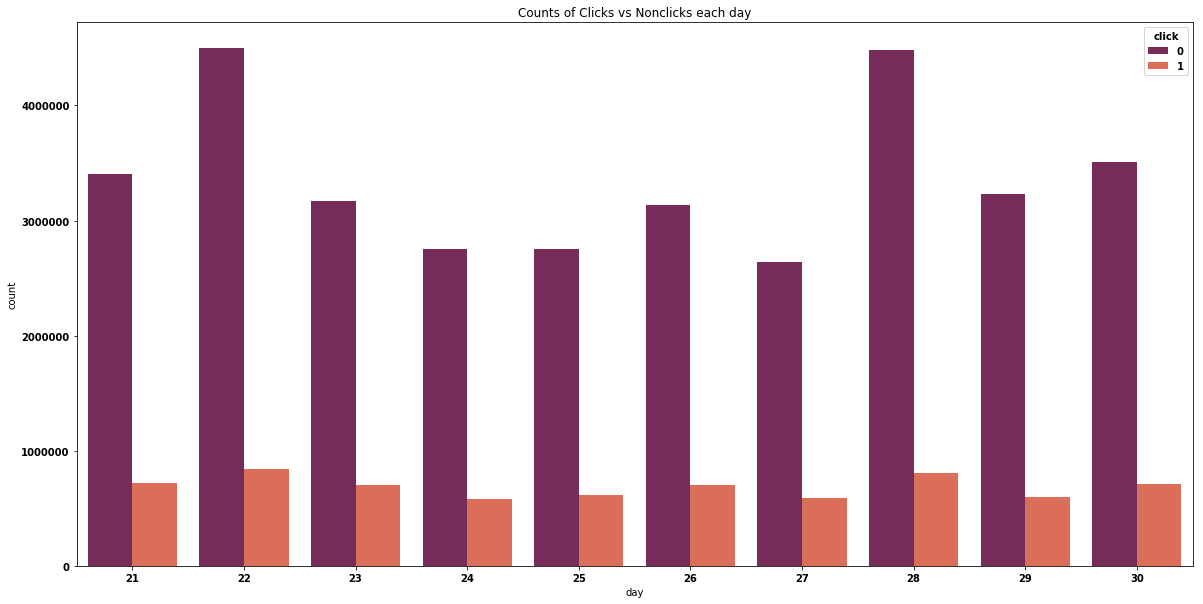

In [3]:
plt.figure(figsize=(20,10))
plt.title('Counts of Clicks vs Nonclicks each day')
sns.countplot(x="day", hue="click", data=df, palette="rocket")


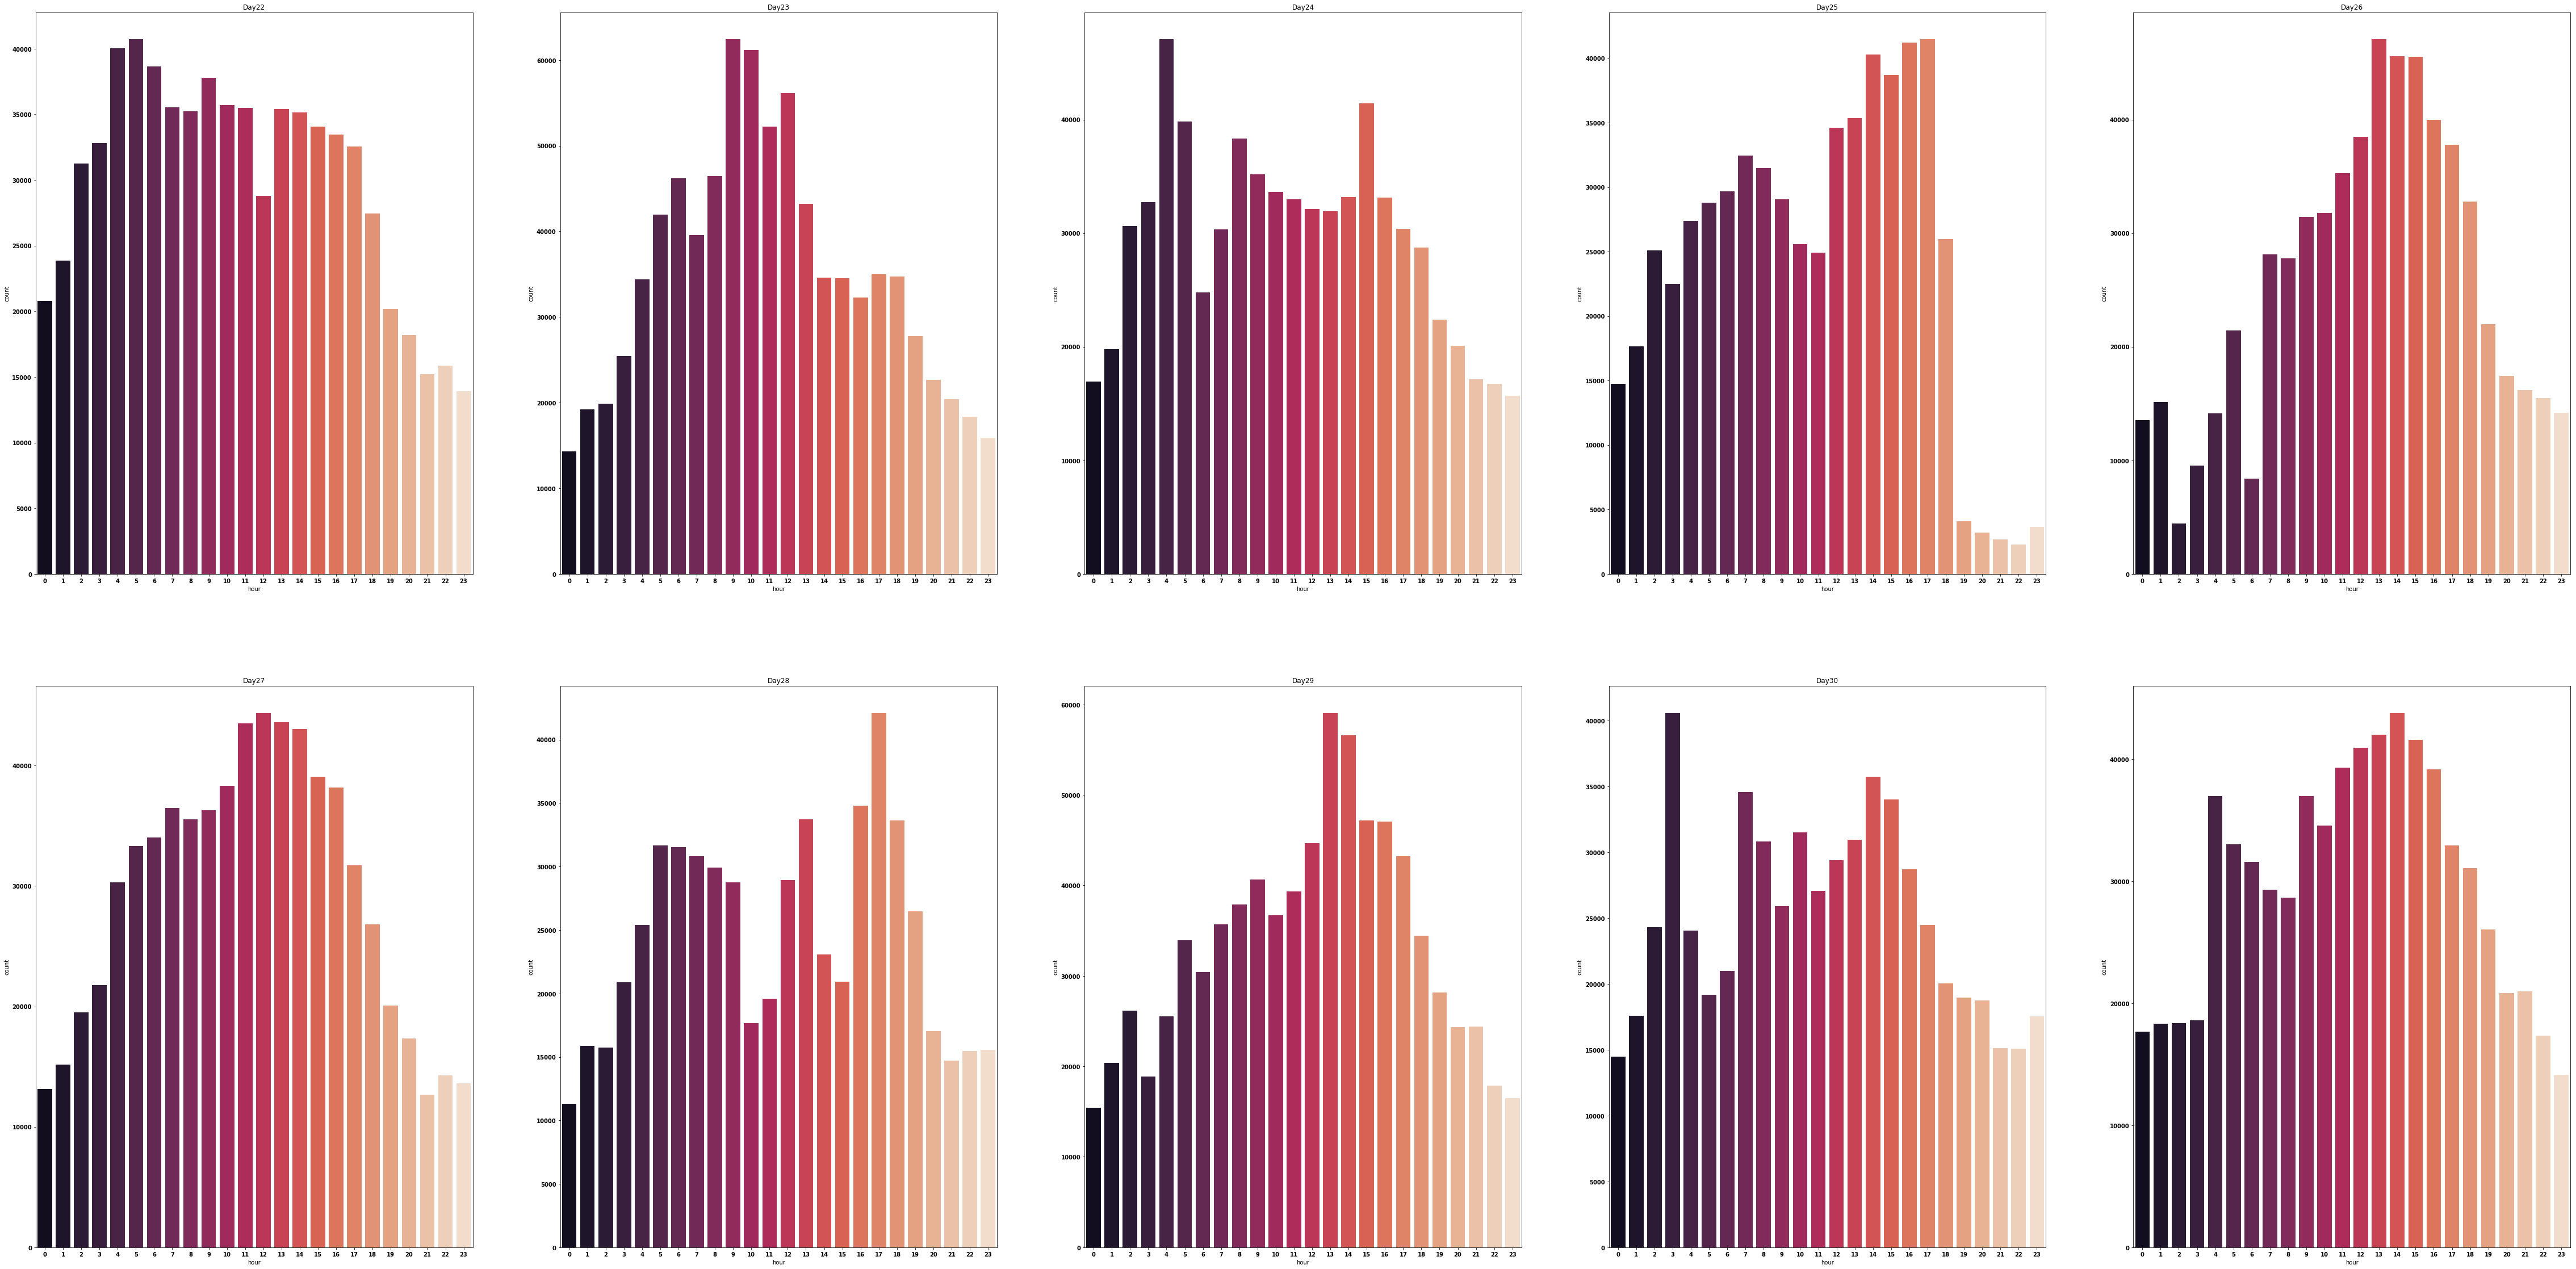

In [4]:
listofdays = list(df.day.unique())
plt.figure(figsize=(80,40))

count = 0
for x in listofdays:
    plt.title('Day' + str(x))
    count += 1
    plt.subplot(2, 5, count)
    sns.countplot(x="hour", data=df[(df['day']==x) & (df['click'] == 1)], palette="rocket")



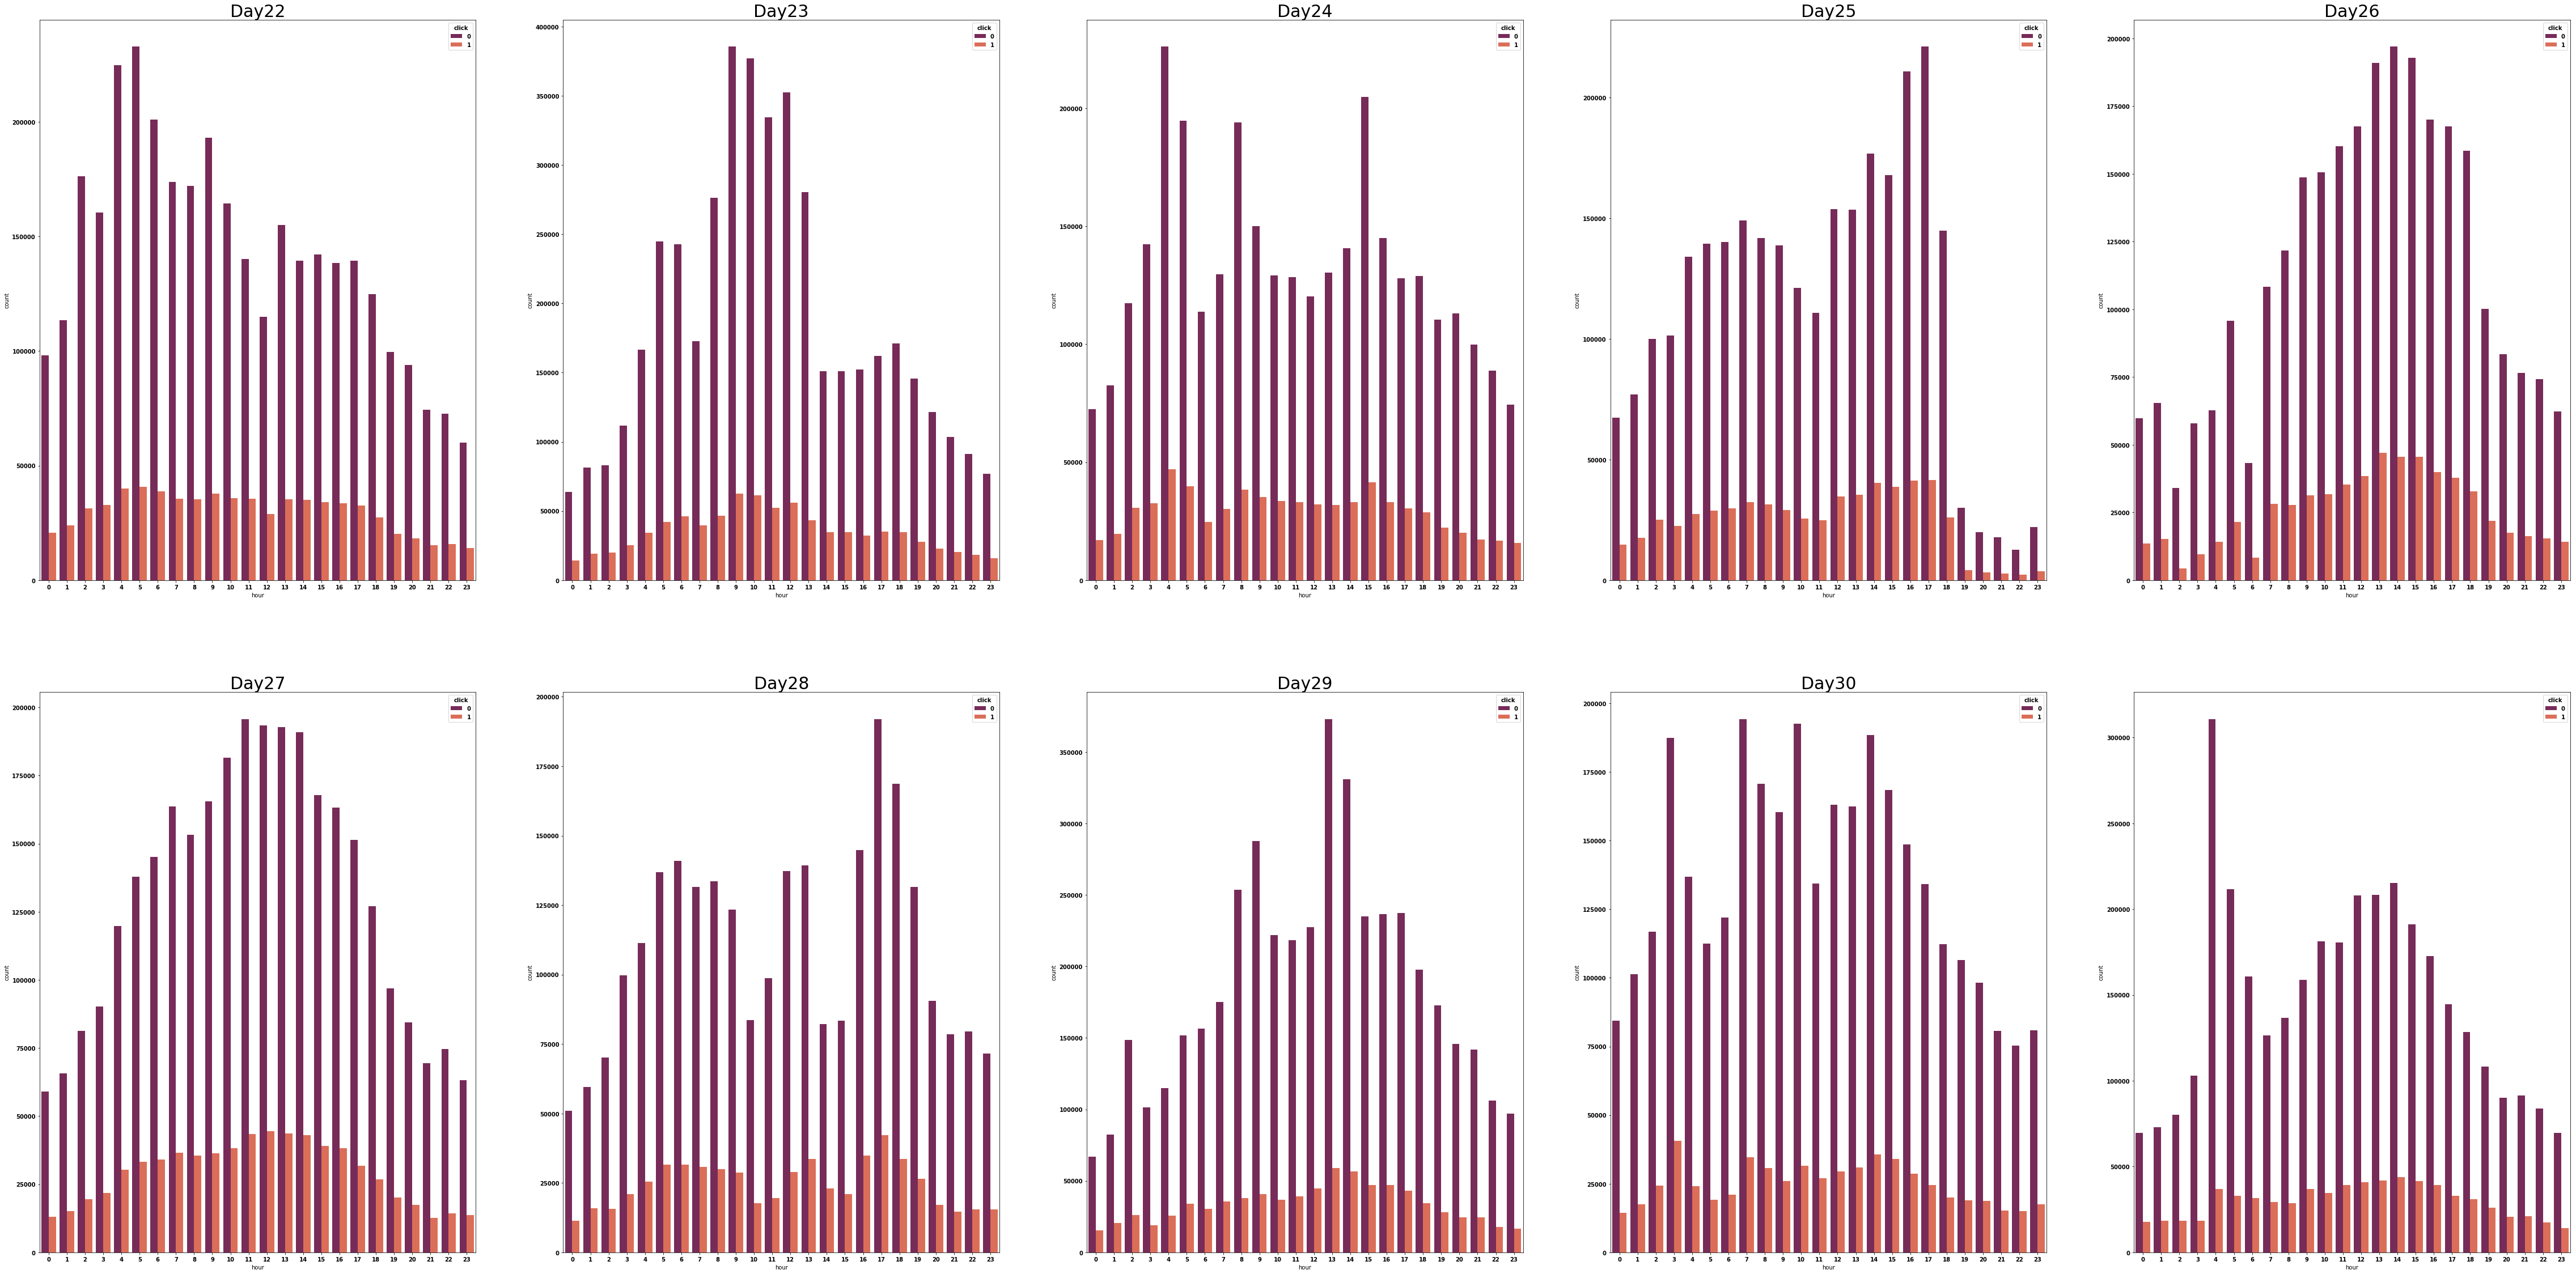

In [5]:
listofdays = list(df.day.unique())
plt.figure(figsize=(80,40))

count = 0
for x in listofdays:
    count += 1
    plt.title('Day' + str(x), fontsize=30)
    plt.subplot(2, 5, count)
    sns.countplot(x="hour", hue='click', data=df[(df['day']==x)], palette="rocket")


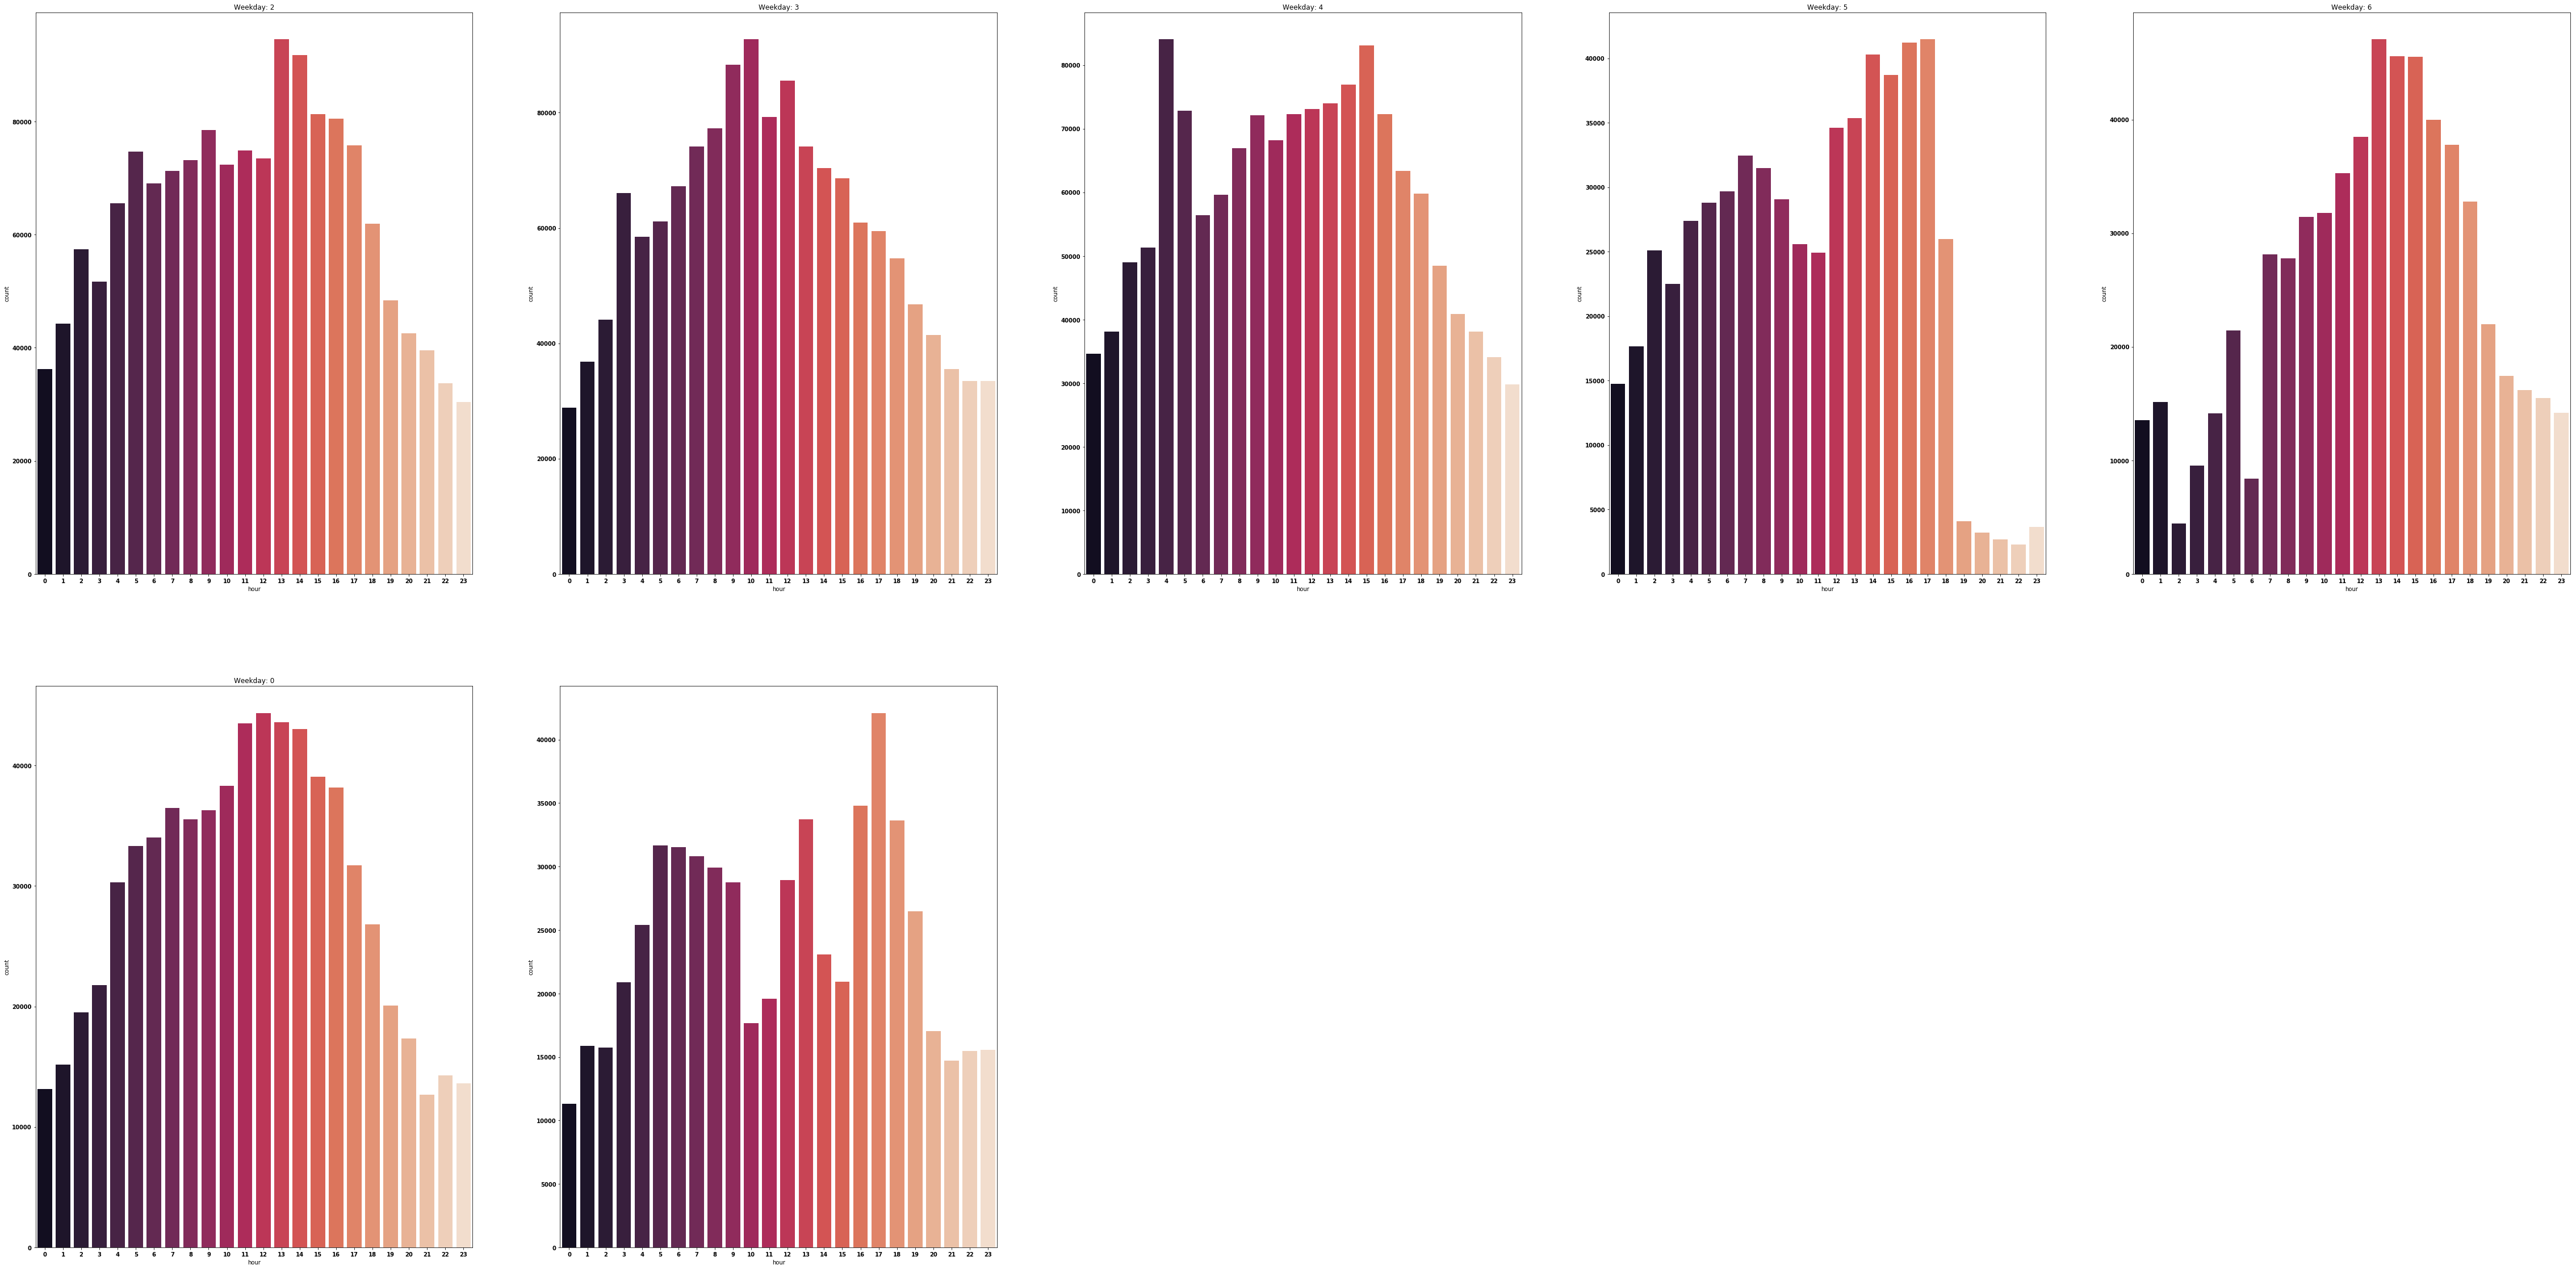

In [6]:
listofdays = list(df.weekday.unique())
plt.figure(figsize=(80,40))

count = 0
for x in listofdays:
    plt.title('Weekday: ' + str(x))
    count += 1
    plt.subplot(2, 5, count)
    sns.countplot(x="hour", data=df[(df['weekday']==x) & (df['click'] == 1)], palette="rocket")



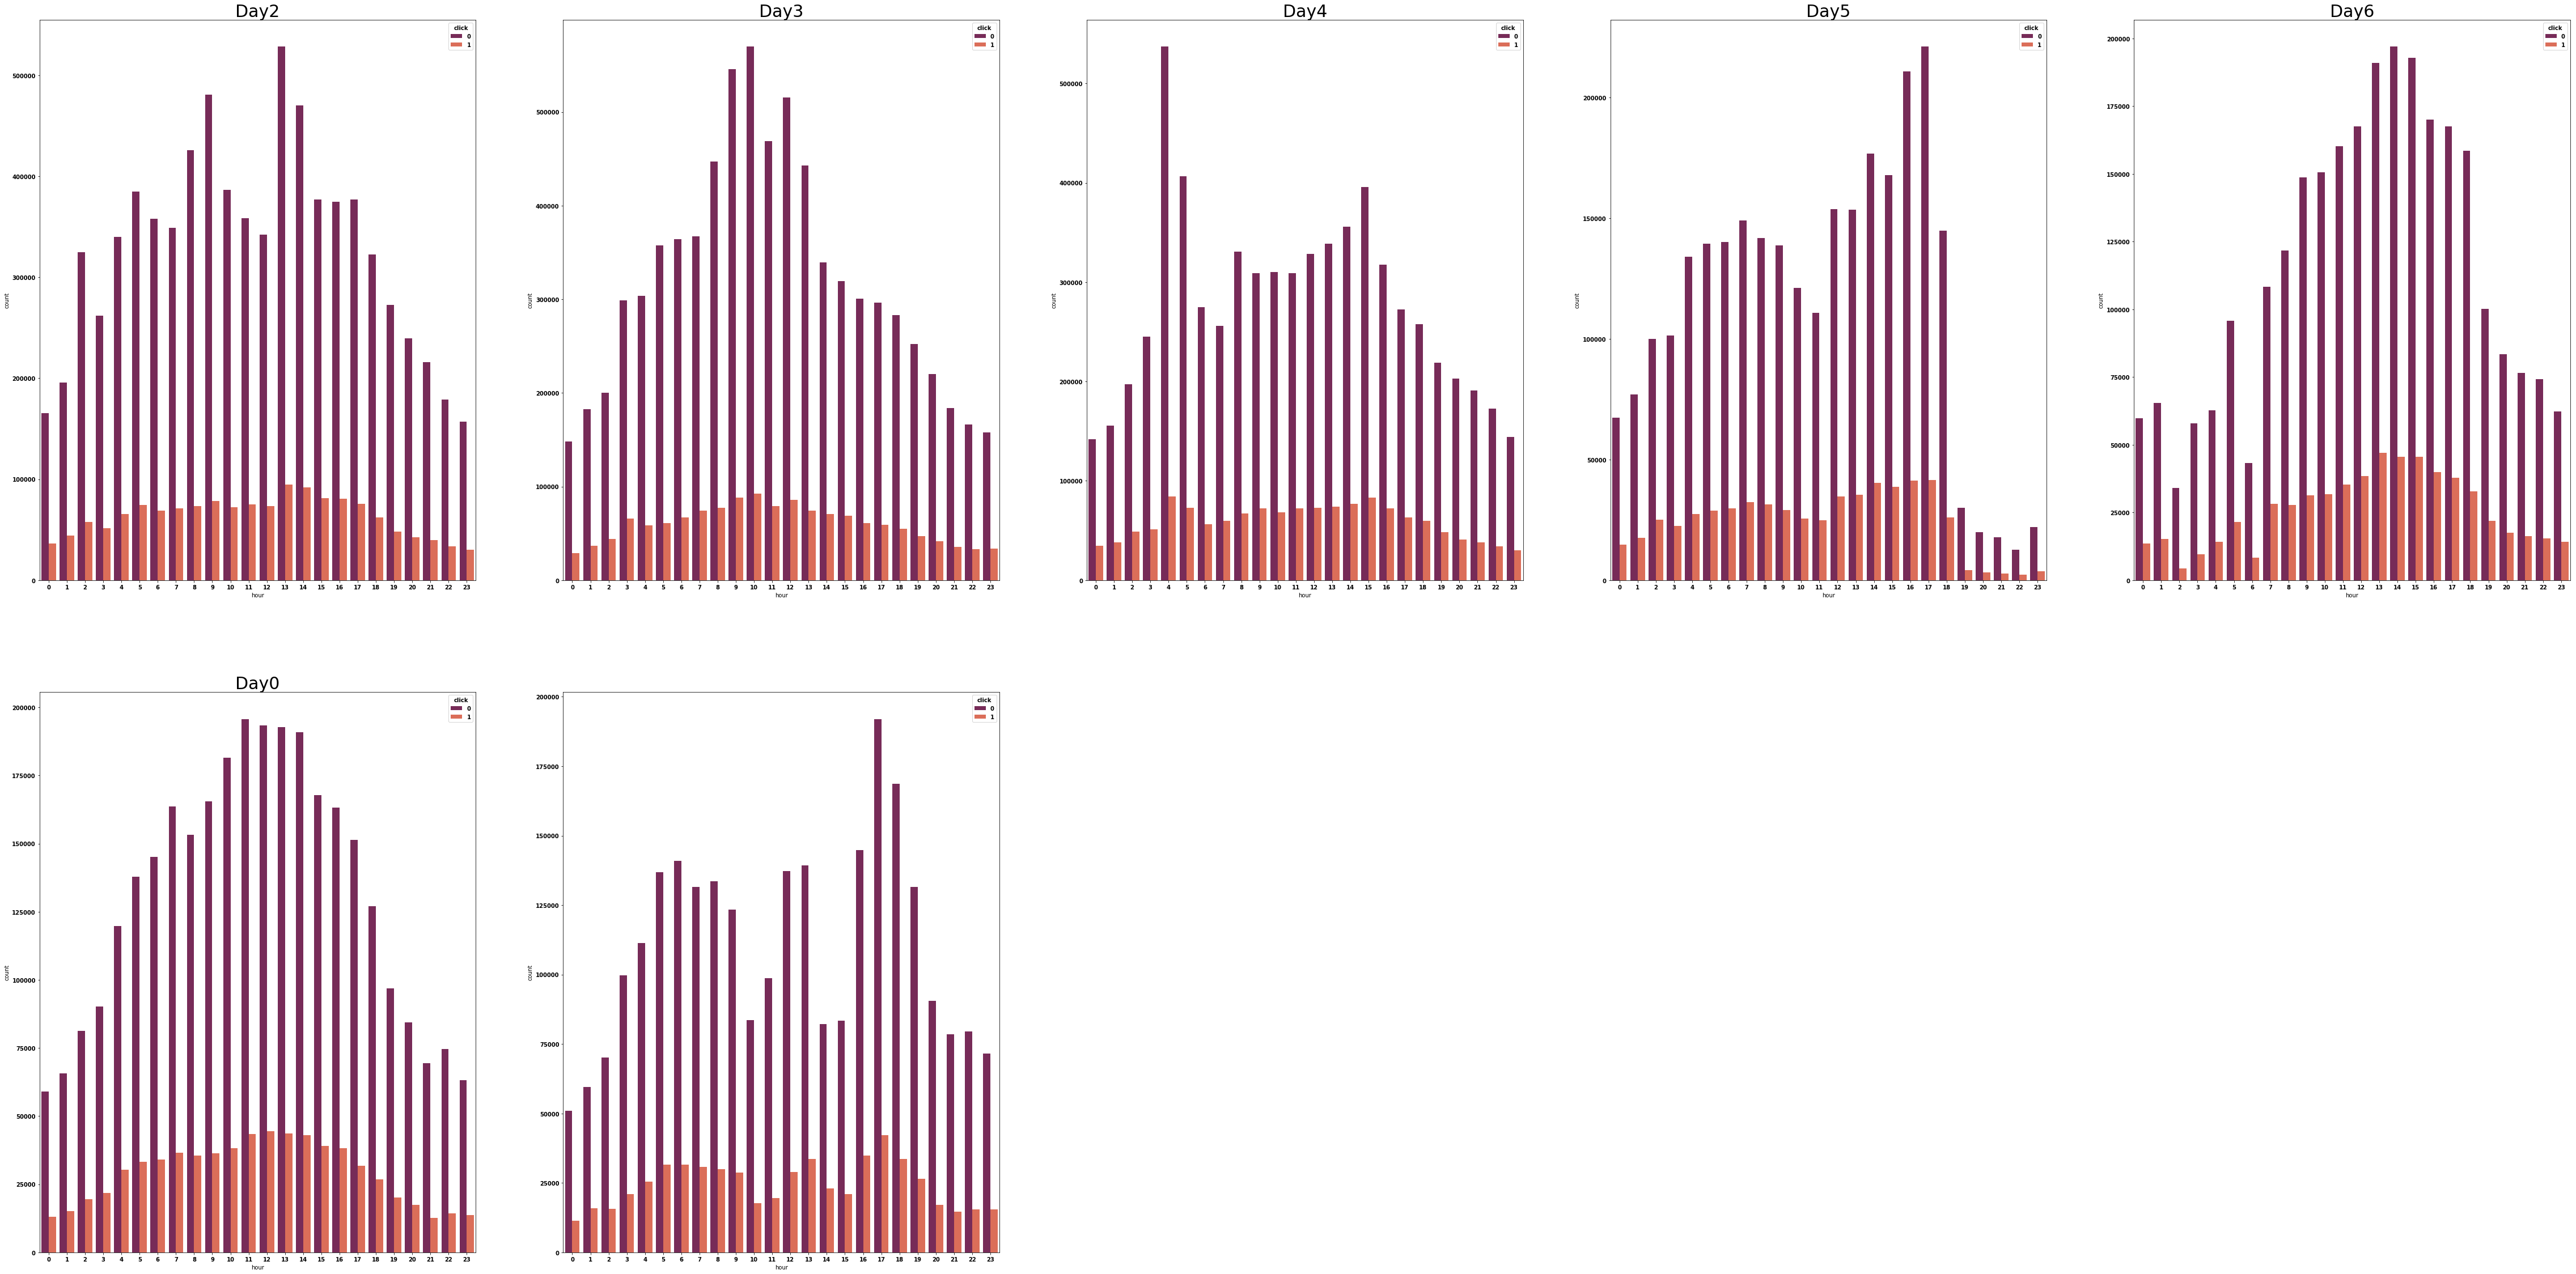

In [7]:
listofdays = list(df.weekday.unique())
plt.figure(figsize=(80,40))

count = 0
for x in listofdays:
    count += 1
    plt.title('Day' + str(x), fontsize=30)
    plt.subplot(2, 5, count)
    sns.countplot(x="hour", hue='click', data=df[(df['weekday']==x)], palette="rocket")


In [1]:
plt.title('Clicks per Hour', fontsize=20)
sns.countplot(x='hour', data=df[df['click']==1], palette='rocket')

NameError: name 'plt' is not defined

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 30 columns):
id                  float32
click               uint8
C1                  uint16
banner_pos          uint8
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         uint8
device_conn_type    uint8
C14                 uint16
C15                 uint16
C16                 uint16
C17                 uint16
C18                 uint8
C19                 uint16
C20                 int32
C21                 uint16
year                uint8
month               uint8
day                 uint8
hour                uint8
weekday             uint8
hourmean            float64
weekdayport         float64
dtypes: float32(1), float64(2), int32(1), object(9), uint16(7), uint8(10)
memory us

In [10]:
#features = pd.DataFrame()
#features = df[['click', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
#        'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour', 'day', 'weekday']].copy()
#features.head()

                     click        C1  banner_pos  device_type  \
click             1.000000 -0.036855    0.025890    -0.037830   
C1               -0.036855  1.000000    0.288329     0.894596   
banner_pos        0.025890  0.288329    1.000000     0.323183   
device_type      -0.037830  0.894596    0.323183     1.000000   
device_conn_type -0.083408  0.195931   -0.083752     0.209063   
C14              -0.060169  0.055226   -0.012926     0.043937   
C15              -0.032521  0.120295    0.060286     0.178742   
C16               0.130007  0.062921    0.022941     0.065195   
C17              -0.055681  0.063637   -0.032304     0.049912   
C18               0.021634 -0.041050    0.094986    -0.045669   
C19              -0.003978  0.002725    0.131640    -0.001971   
C20              -0.057506 -0.035056    0.055297    -0.048553   
C21              -0.069953  0.035535   -0.097382     0.035808   
day              -0.007762 -0.005767    0.026929    -0.005926   
hour             -0.00149

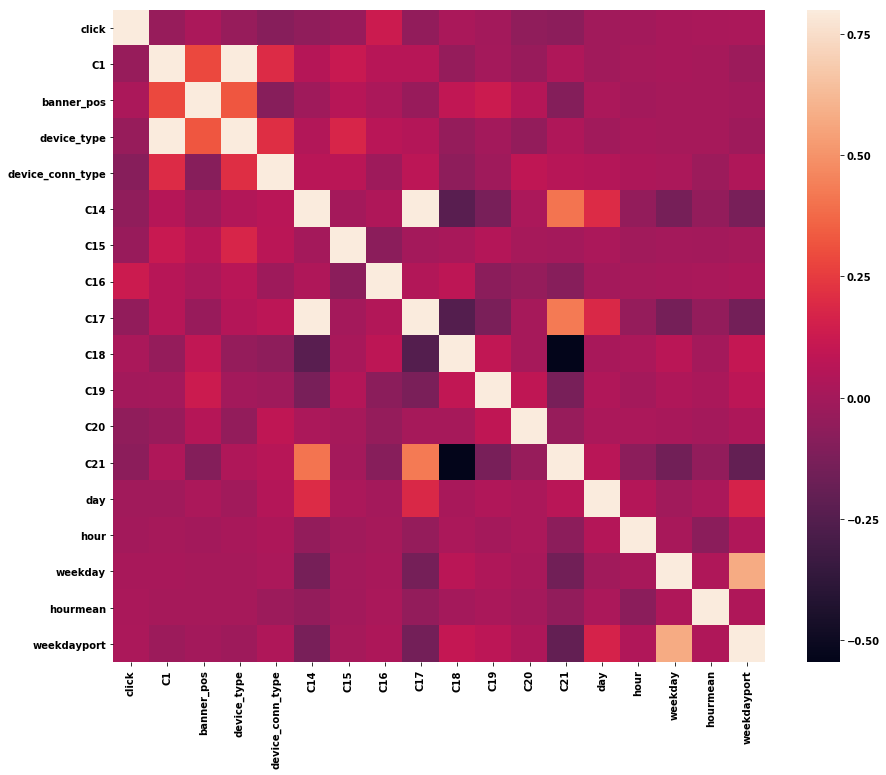

In [11]:

# Make the correlation matrix.
corrmat = df.drop(['year', 'month', 'id'],1).corr()
print(corrmat)


f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [12]:
#Creating a feature that is the mean of that hour

listy=list(df.groupby(['hour']).click.mean())

def hourmean(x):
    x = listy[x]
    return x

df['hourmean'] = df['hour'].apply(hourmean)

In [13]:
#df.apply(lambda x: len(x.unique()))

In [14]:
for column in df:
    print('*******************************************************************')
    print(str(column) + ' number of unique values  :::::::::::::::::  ' + str(len(df[column].unique())))
    print('*******************************************************************\n')

*******************************************************************

id number of unique values  :::::::::::::::::  21890991

*******************************************************************

click number of unique values  :::::::::::::::::  2

*******************************************************************

C1 number of unique values  :::::::::::::::::  7

*******************************************************************

banner_pos number of unique values  :::::::::::::::::  7

*******************************************************************

site_id number of unique values  :::::::::::::::::  4737

*******************************************************************

site_domain number of unique values  :::::::::::::::::  7745

*******************************************************************

site_category number of unique values  :::::::::::::::::  26

*******************************************************************

app_id number of unique values  ::::::::::::::::

In [15]:
df['site_category'].value_counts()

50e219e0    16537234
f028772b    12657073
28905ebd     7377208
3e814130     3050306
f66779e6      252451
75fa27f6      160985
335d28a8      136463
76b2941d      104754
c0dd3be3       42090
72722551       28216
dedf689d       24500
70fb0e29       24224
0569f928       17106
8fd0aea4        7482
a818d37a        3230
42a36e14        2515
e787de0e        1209
bcf865d9        1045
5378d028         483
9ccfa2ea         318
c706e647          28
da34532e          23
74073276          14
110ab22d           6
6432c423           2
a72a0145           2
Name: site_category, dtype: int64

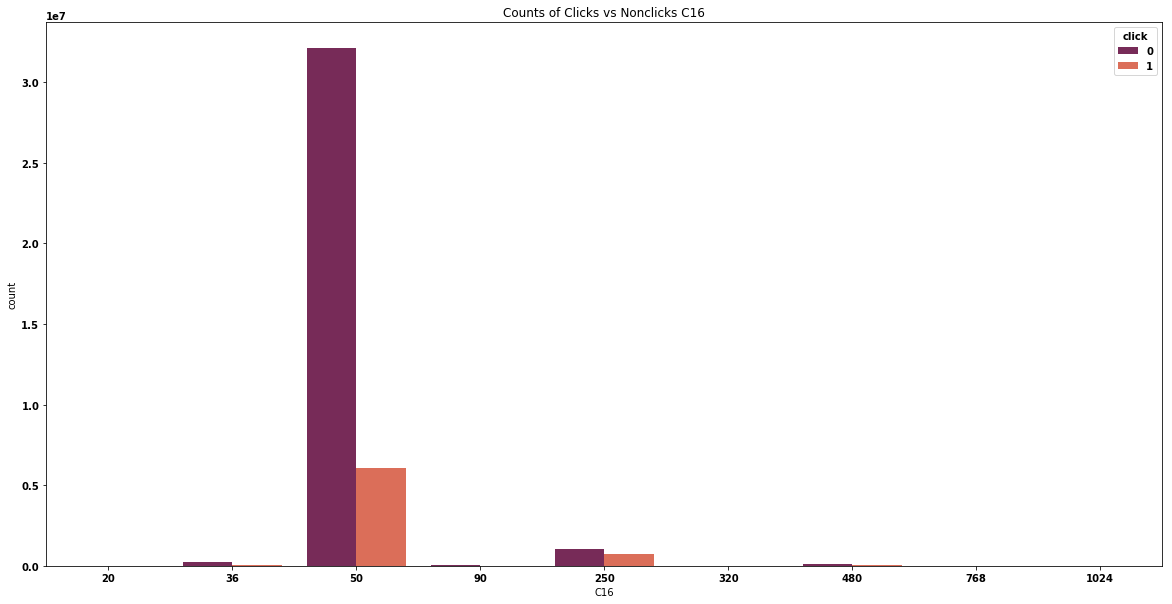

In [16]:
plt.figure(figsize=(20,10))
plt.title('Counts of Clicks vs Nonclicks C16')
sns.countplot(x="C16", hue="click", data=df, palette="rocket")


In [17]:
def weekdayport(group):

    group['weekdayport'] = group.click.sum() / group.click.count()

    return group


df = df.groupby('weekday').apply(weekdayport)



In [18]:
df['weekdayport'].unique()

array([0.16182836, 0.15691415, 0.1754574 , 0.17471581, 0.18240195,
       0.18304895, 0.18159417])

In [19]:
df['hourmean'] = df['hourmean'].astype(np.float32)
df['weekdayport'] = df['weekdayport'].astype(np.float32)

                     click        C1  banner_pos  device_type  \
click             1.000000 -0.036855    0.025890    -0.037830   
C1               -0.036855  1.000000    0.288329     0.894596   
banner_pos        0.025890  0.288329    1.000000     0.323183   
device_type      -0.037830  0.894596    0.323183     1.000000   
device_conn_type -0.083408  0.195931   -0.083752     0.209063   
C14              -0.060169  0.055226   -0.012926     0.043937   
C15              -0.032521  0.120295    0.060286     0.178742   
C16               0.130007  0.062921    0.022941     0.065195   
C17              -0.055681  0.063637   -0.032304     0.049912   
C18               0.021634 -0.041050    0.094986    -0.045669   
C19              -0.003978  0.002725    0.131640    -0.001971   
C20              -0.057506 -0.035056    0.055297    -0.048553   
C21              -0.069953  0.035535   -0.097382     0.035808   
day              -0.007762 -0.005767    0.026929    -0.005926   
hour             -0.00149

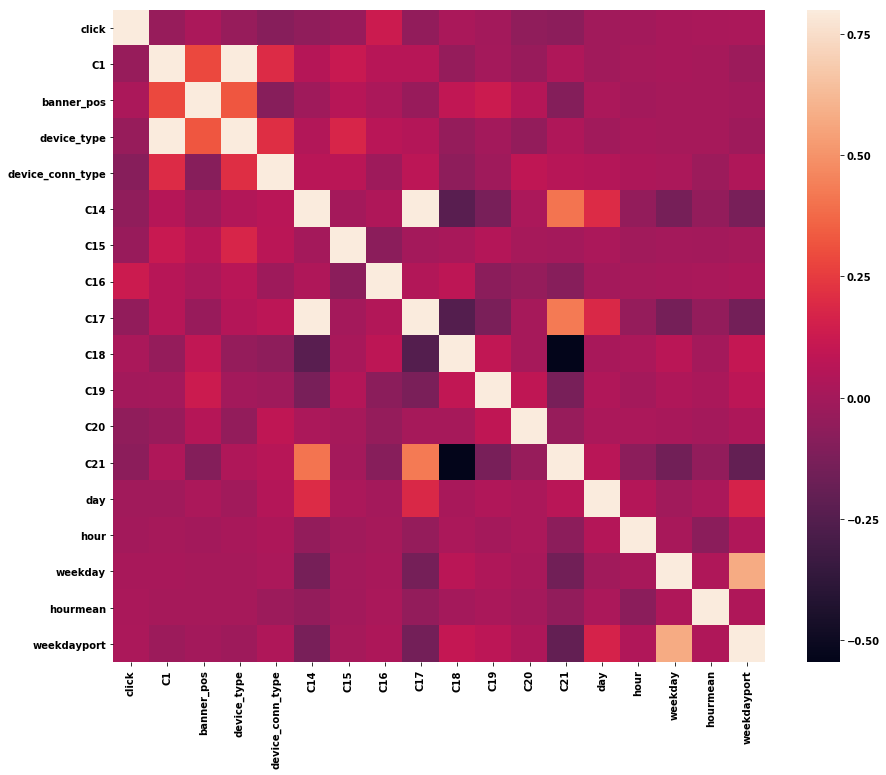

In [20]:

# Make the correlation matrix.
corrmat = df.drop(['year', 'month', 'id'],1).corr()
print(corrmat)


f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [22]:
# These have no effect because the data is in a ten day period all in the same month and year

df = df.drop(['year', 'month'],1)

In [23]:
df.to_pickle('../../Data/Mobile/train.pkl')